## Week 4 : Regularization & Dimensionality Reduction 

<hr>


```
Lab Plan
1. Regularization : Lasso and Ridge
2. Selecting optimal alpha for regularization
3. Dimensionality Reduction from scratch with numpy
4. Dimensionality Reduction with Sklearn
5. Assignment 1
```

<hr>


## 1. Regularization : Lasso and Ridge

Both models are the regularized forms of the linear regression.
Lasso with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coeffeicients/weight, where they must reside in.

### Issues:
1. When to use Lasso?
2. When to use Ridge?
3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda?


## 1.1 Loading California housing dataset

Housing-Prices Values in Suburbs of California

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

## 1.2 Fitting both Lasso and Ridge
<span style="color:red">Task:  Fit two models: Lasso and Ridge - with the default alpha.
Then print their coefficients and notice the difference.</span>

In [2]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
lasso.fit(x_train, y_train)
ridge = Ridge()
ridge.fit(x_train, y_train)

print('Lasso coef', lasso.coef_)
print('Ridge coef', ridge.coef_)

Lasso coef [ 1.47603065e-01  5.29413055e-03  0.00000000e+00 -0.00000000e+00
 -7.41147208e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Ridge coef [ 4.41229578e-01  9.08581845e-03 -1.13972707e-01  6.50328073e-01
 -8.46621287e-06 -4.53044362e-03 -4.15242754e-01 -4.25974552e-01]


In [3]:
lasso.alpha

1.0

### 1.3 Searching for optimal $\alpha$

<span style="color:red"><strong>Task</strong>: Let's try different values for alpha for Lasso regressor and plot the validation loss.</span>

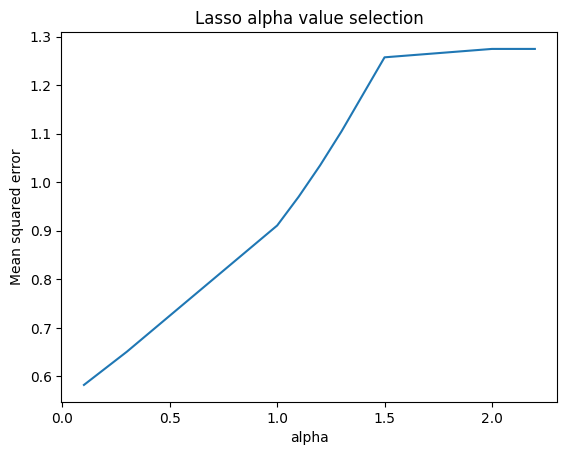

Best value of alpha: 0.1


In [4]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (4 lines): create a Lasso regressor with the alpha value.
    lasso = Lasso(alpha= alpha)
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_val)
    # calculate the mean squared error loss, then append it to the losses array
    losses.append(mean_squared_error(y_val, y_pred))
    pass
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

Measuring the loss on the testset with Lasso regressor with the best alpha.

In [ ]:
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))

## 2. Principal Component Analysis (PCA)

1. How does PCA reduce data dimensionality?
2. What is eigenvector?

<span style="color:red"><strong>Task:</strong> Now you will implement basic steps of PCA: mean-centering, eigenvectors calculation using covariance matrix, projecting data to the first PC, and restoring it back.</span>

## 2.1 Generating data

In [ ]:
# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', label='Original Data', color="green")
plt.legend()

plt.axis([-6, 2, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.2 Centering Data

In [ ]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
mean_vector = None
data_centered = None

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.axis([-6, 2, -3, 6])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.3 Covariance matrix

In [ ]:
# calculate covariance matrix for our centered data
cov_mat = None
print('Covariance matrix:\n', cov_mat)

# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = 1/(N-1) * np.sum(data_centered[:,0] * data_centered[:,1])
print('\ncov(X,Y):', cov_xy)

### 2.4 Eigenvectors and eigenvalues

In [ ]:
# compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = None
print('Eigenvalues:', eig_values)
print('Eigenvectors:\n', eig_vectors)

# are they already in the needed order?
# order eigenvectors and eigenvalues by eigenvalues, descending
idx = None
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]
print('\nsorted eigenvalues:', eig_values)
print('sorted Eigenvectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = eig_values / eig_values.sum()
print('\nRetained variance:',   retained_var)

### 2.5 Project data

In [ ]:
# project data to the first principal component
first_pc = np.expand_dims(eig_vectors[:,0], axis=1)
projected_data = None

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="centered")
plt.plot(projected_data, np.ones(len(projected_data)), '.', color="red",  label="projected")
plt.axis([-6, 3, -3, 6])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.6 Restore data back

In [ ]:
# project data back to initial space
# remember to add a mean_vector to the restored data
restored_data = np.dot(projected_data, first_pc.T) + mean_vector

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. SKLEARN implementation

In [ ]:
# this is to check your solution
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_PCA = pca.fit_transform(data)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.plot(x_PCA, np.zeros(len(projected_data)), '.', color="red", label="Projected")
plt.axis([-6, 3, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')
plt.legend()

print('Mean : ', pca.mean_)
print('explained variance : ',pca.explained_variance_)
print('explained variance ratio: ',pca.explained_variance_ratio_)

### explained variance ratio

It provides insights into the amount of information retained by each principal component and helps assess their significance in capturing the underlying patterns in the data

In [ ]:
pca.explained_variance_ratio_

## 3. SKLEARN implementation

In [ ]:
# this is to check your solution
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_PCA = pca.fit_transform(data)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.plot(x_PCA, np.zeros(len(projected_data)), '.', color="red", label="Projected")
plt.axis([-6, 3, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')
plt.legend()

print('Mean : ',pca.mean_)
print('explained variance : ',pca.explained_variance_)
print('explained variance ratio: ',pca.explained_variance_ratio_)

## <center>Self-Practice  Task</center>

* Using dataset given for you Assignment task 2.
    1. Train a logistic regression model with Regularization
    1. Train a logistic regression model with data after PCA
    1. Calculate Accuracy, Precision and Recall values for each of the above trained models